<a href="https://colab.research.google.com/github/kierannp/3dsnet/blob/main/Sample_pretrained_chair_3dsnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised 3d Style Tranfer via 3dsnet

All credit for most of the code base and model to:


@article{segu20203dsnet,
  title={3DSNet: Unsupervised Shape-to-Shape 3D Style Transfer},
  author={Segu, Mattia and Grinvald, Margarita and Siegwart, Roland and Tombari, Federico},
  journal={arXiv preprint arXiv:2011.13388},
  year={2020}
}


Checkout the 3dsnet [repo](https://github.com/ethz-asl/3dsnet)



Author of this colab: [KieranNP](https://github.com/kierannp)

List of available models compatible with current codebase

CHAIRS (using our Adaptive-Meshflow backbone):
- 3dsnet (with reconstruction loss, adversarial loss and cycle-consistency loss)
- adanorm (only reconstruction loss, style transfer is attempted by relying only on the adaptive normalization layers)

PLANES (using our Adaptive-Atlasnet backbone):
- 3dsnet (with reconstruction loss, adversarial loss and cycle-consistency loss)
- 3dsnet_no_cycle (with reconstruction loss and adversarial loss)
- adanorm (only reconstruction loss, style transfer is attempted by relying only on the adaptive normalization layers)

Files included:
- log.txt, contains training statistics per each training epoch
- network.pth, model weights at last training epoch
- network_best.pth, model weights at best training epoch
- options.json, options used for training the model

In [ ]:
#@title Installations required {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

# %%capture
%cd /content/
%env PYTHONPATH=
! wget https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
! chmod +x Miniconda3-4.5.4-Linux-x86_64.sh
! bash ./Miniconda3-4.5.4-Linux-x86_64.sh -b -f -p /usr/local
import sys
import os

sys.path.append('/usr/local/lib/python3.6/site-packages/')

!conda install --channel defaults conda python=3.6 --yes
!conda update --channel defaults --all --yes
if not os.path.exists("/content/3dsnet"):
  !git clone --recurse-submodules https://github.com/ethz-asl/3dsnet.git

!conda create -n 3dsnet python=3.6 --yes
!source activate 3dsnet

!pip install meshio[all]

!conda install  pytorch=1.7.1 torchvision=0.8.2 cudatoolkit=10.1 -c pytorch --yes
!conda install -y -c conda-forge pyembree
!conda install -y -c conda-forge trimesh seaborn
!conda install -y -c fvcore -c iopath -c conda-forge fvcore iopath
# !pip install "git+https://github.com/facebookresearch/pytorch3d.git@stable"
!conda install -y pytorch3d -c pytorch3d
# !pip install pytorch3d -f https://dl.fbaipublicfiles.com/pytorch3d/packaging/wheels/py36_cu101_pyt170/download.html
!conda install -y -c conda-forge visdom

if not os.path.exists("/content/3dsnet/PyMesh"):
  %cd /content/3dsnset
  !git clone https://github.com/PyMesh/PyMesh.git
  %cd PyMesh
  !git submodule update --init
  !export PYMESH_PATH=$(pwd)

  !apt-get install \
	libeigen3-dev \
	libgmp-dev \
	libgmpxx4ldbl \
	libmpfr-dev \
	libboost-dev \
	libboost-thread-dev \
	libtbb-dev \
	python3-dev \
	python3-setuptools \
	python3-numpy \
	python3-scipy \
	python3-nose \
	python3-pip \
	cmake

  %cd $PYMESH_PATH/third_party
  !mkdir build
  !./build.py all
  %cd $PYMESH_PATH
  !mkdir build
  !python3
   setup.py build # This an alternative way of calling cmake/make
  !python3 setup.py install
  %cd ..

!pip install trimesh

!pip install git+https://github.com/rtqichen/torchdiffeq torchvision
!pip install git+https://github.com/cnr-isti-vclab/PyMeshLab
%cd /content/3dsnet
!pip install --user --requirement  requirements.txt # pip dependencies

/content
env: PYTHONPATH=
--2021-05-20 19:42:12--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

Miniconda3-4.5.4-Li 100%[===================>]  55.76M   219MB/s    in 0.3s    

2021-05-20 19:42:13 (219 MB/s) - ‘Miniconda3-4.5.4-Linux-x86_64.sh’ saved [58468498/58468498]

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
Python 3.6.5 :: Anaconda, Inc.
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670d

Solving environment: - \ | / - \ | / - \ | / failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ | / - \ | / - \ | / - \ | / - \ | failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - pytorch=1.7.1
    - torchvision=0.8.2


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    blas-1.0                   |              mkl           6 KB
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    dataclasses-0.8            |     pyh4f3eec9_6          22 KB
    freetype-2.10.4        

In [ ]:
##      Since PyMesh and pytorch3d both are having installations issues that I cant figure out....


#       DO THIS ON THE FILES OR YOU WILL HAVE IMPORT ERRORS


# trainer.py from PyMesh.python.pymesh.meshio import form_mesh
# mesh_processor.py from PyMesh.python.pymesh.meshio import save_mesh
# template.py remove pymesh import

# Removed the pytorch3d imports from train_loss.py, model.py due to improper installation issue from pytorch3d repo

Need to link pre-trained models to your google drive account from [HERE](https://drive.google.com/drive/folders/1cyVRUmtN_YF-TXkytKfn1M0HlGH9Qux_?usp=sharing) then link your drive to colab. Or download the pretrained models then place in /content/3dsnet/

Since the encoders are trained on each family objects individually, right now the only pre-trained models are for chairs and planes, although the training for other classes can be performed.

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
# %cp -r /gdrive/MyDrive/Colab\ Notebooks/3dsnet_models /content/3dsnet
# %cp -r /gdrive/MyDrive/Colab\ Notebooks/3dsnet_models/aux_models/ /content/3dsnet

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
#@title Helper Functions {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

def load_mesh_obj(path):
  mesh = trimesh.load_mesh(path)
  if isinstance(mesh, trimesh.Scene):
   mesh = mesh.dump()[0]
  return mesh

def plot_meshes(mesh_list,
                fig_size=8,
                el=45,
                rot_start=90,
                vert_size=10,
                vert_alpha=0.25,
                n_cols=4):
  """Plots mesh data using matplotlib."""

  n_plot = len(mesh_list)
  n_cols = np.minimum(n_plot, n_cols)
  n_rows = np.ceil(n_plot / n_cols).astype('int')
  fig = plt.figure(figsize=(fig_size * n_cols, fig_size * n_rows))
  for p_inc, mesh in enumerate(mesh_list):

    ax = fig.add_subplot(n_rows, n_cols, p_inc + 1, projection='3d')

    if 'faces' in mesh:
      face_verts = mesh['vertices']
      collection = []
      for f in mesh['faces']:
        collection.append(face_verts[f])
      plt_mesh = Poly3DCollection(collection)
      plt_mesh.set_edgecolor((0., 0., 0., 0.3))
      plt_mesh.set_facecolor((1, 0, 0, 0.2))
      ax.add_collection3d(plt_mesh)

    if mesh['vertices'] is not None:
      ax.scatter3D(
          mesh['vertices'][:, 0],
          mesh['vertices'][:, 1],
          mesh['vertices'][:, 2],
          lw=0.,
          s=vert_size,
          c='g',
          alpha=vert_alpha)

    # if mesh['pointcloud'] is not None:
    #   ax.scatter3D(
    #       mesh['pointcloud'][:, 0],
    #       mesh['pointcloud'][:, 1],
    #       mesh['pointcloud'][:, 2],
    #       lw=0.,
    #       s=2.5 * vert_size,
    #       c='b',
    #       alpha=1.)
    
    ax.view_init(el, rot_start)

    display_string = ''
    if mesh['faces'] is not None:
      display_string += 'Num. faces: {}\n'.format(len(collection))
    if mesh['vertices'] is not None:
      num_verts = mesh['vertices'].shape[0]
      # if mesh['vertices_conditional'] is not None:
      #   num_verts += mesh['vertices_conditional'].shape[0]
      display_string += 'Num. verts: {}\n'.format(num_verts)
    # if mesh['class_name'] is not None:
    #   display_string += 'Synset: {}'.format(mesh['class_name'])
    # if mesh['pointcloud'] is not None:
    #   display_string += 'Num. pointcloud: {}\n'.format(
    #       mesh['pointcloud'].shape[0])
    ax.text2D(0.05, 0.8, display_string, transform=ax.transAxes)
  plt.subplots_adjust(
      left=0., right=1., bottom=0., top=1., wspace=0.025, hspace=0.025)
  plt.show()

def load_data_from_file(path):
    ext = path.split('.')[-1]
    if ext == 'npy':
        points = np.load(path)
    elif ext == 'ply' or ext == 'obj':
        points = trimesh.load_mesh(path)
        if isinstance(points, trimesh.Scene):
          points = points.dump()[0].vertices
        else:
          points = points.vertices
    else:
        print('invalid file extension')
        raise IOError
    points = torch.from_numpy(points.copy()).float()
    operation = pointcloud_processor.Normalization(points, keep_track=True)
    if opt.normalization == 'UnitBall':
        operation.normalize_unitL2ball()
    elif opt.normalization == 'BoundingBox':
        operation.normalize_bounding_box()
    else:
        pass
    return_dict = {
        'points': points,
        'operation': operation,
        'path': path,
    }
    return return_dict

def unnormalize(mesh, operation=None):
    if operation is not None:
        # Undo any normalization that was used to preprocess the input.
        vertices = torch.from_numpy(mesh.vertices).clone().unsqueeze(0)
        norm_mesh = deepcopy(mesh)
        norm_mesh.vertices = operation.apply(vertices).squeeze().numpy()
        norm_mesh._data.__dict__['data']['vertices'] = norm_mesh.vertices
        if np.sum(norm_mesh.vertices - mesh.vertices) == 0:
          print("fucked normalization")
        return norm_mesh

In [ ]:
#@title HyperParameters
#@markdown Options to change in the model

family = "chair" #@param ["chair", "bananas", "oranges"] {allow-input: true}
decoder = "meshflow" #@param ["meshflow", "atlasnet"] {allow-input: true}
noise_level =  1 #@param {type:"number"}
log_dir =  "log/" #@param {type:"string"}
data_dir =  "/content/3dsnet/docs/points/" #@param {type:"string"}
reload_model_path =  '/content/3dsnet/3dsnet_models/3dsnet_models/chairs/meshflow/3dsnet/network.pth' #@param {type:"string"}
#@markdown ---


In [ ]:
#@title Options for trainer {display-mode: "form"}

# This code will be hidden when the notebook is loaded.

from easydict import EasyDict as edict

opt = edict({ "decoder_type" : decoder,
       'demo': False,
       "SVR_0": False,
       "SVR_1" : False,
       "family": family,
       "data_dir" : data_dir,
       "dir_name" : log_dir,
       "dataset" :"ShapeNet",
       "weight_perceptual": 1,
       "reload_model_path" : reload_model_path, 
       "batch_size" : 4, 
       "batch_size_test" : 4,
       "class_choice" : ["armchair","straight chair,side chair"], 
       "generator_norm" : "bn",
       "discriminator_norm" : "bn",
       "discriminator_activation" : "relu",
       "dis_bottleneck_size" : 1024,
       "style_bottleneck_size" : 512,
       "generator_lrate" : 0.001,
       "discriminator_lrate" : 0.004,
       "batch_size" : 16, 
       "generator_update_skips" : 1, 
       "discriminator_update_skips" : 1, 
       "num_layers" : 2,
       "num_layers_style" : 1,
       "nb_primitives" : 25, 
       "template_type" : "SQUARE",
       "weight_chamfer" : 10,
       "weight_cycle_chamfer" : 0,
       "weight_adversarial" : 1,
       "weight_content_reconstruction" : 1,
       "weight_style_reconstruction" : 1,
       "lr_decay_1" : 120,
       "lr_decay_2" : 140, 
       "lr_decay_3" : 145, 
       "decode_style":True, 
       "share_decoder":True,
       "share_content_encoder":True, 
       "share_discriminator_encoder":True,
       "gan_type" : "lsgan",
       "use_visdom":False,
       "start_epoch":0,
       "adaptive":True,
       "noise_magnitude" : 1.0,
       "num_interpolations" : 0,
       "normalization":"UnitBall",
       "number_points":2500,
       "multi_gpu":[0],
       "use_default_demo_samples":True,
       "multiscale_loss":False,
       "bottleneck_size":1024,
       "number_points_eval":2500,
       "w_multiscale_1":.1,
       "w_multiscale_2":.2,
       "w_multiscale_3":.7,
       "remove_all_batchNorms": False,
       "dim_template":2,
       "hidden_neurons":512,
       "activation": "relu",
       "share_style_encoder": False,
       "num_layers_mlp": 3,
       "no_learning":True,
       "reload_decoder_path" : '',
       "reload_pointnet_path":'',
       "demo_input_dir": "./docs/points/",
       "num_demo_pairs":5,
       "share_style_mlp": True})

In [ ]:
import sys
import torch
import training.trainer as trainer
import auxiliary.my_utils as my_utils
import numpy as np
import os
from easydict import EasyDict
from PyMesh.python.pymesh.meshio import form_mesh
from dataset.dataset_shapenet import ShapeNet
import dataset.pointcloud_processor as pointcloud_processor
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import trimesh
from copy import deepcopy

path_a = "./docs/points/armchair.points.ply.npy"
path_b = "./docs/points/straight chair,side chair.points.ply.npy"

torch.cuda.set_device(opt.multi_gpu[0])

trainer = trainer.Trainer(opt)
trainer.build_network()
trainer.reload_best_network()
trainer.demo_pair_path = ""

with torch.no_grad():
    data_a = EasyDict(load_data_from_file(path_a))
    data_b = EasyDict(load_data_from_file(path_b))
    
    # prepare normalization
    trainer.make_network_input(data_a, opt.SVR_0)
    trainer.make_network_input(data_b, opt.SVR_1)
    x = {opt.class_choice[0]: data_a.network_input, opt.class_choice[1]: data_b.network_input}
    
    # set the normalization operation
    trainer.set_operation(data_a, data_b)

    # Get results of forward pass
    path_ab, mesh_ab_normalized = trainer.generate_mesh_from_classes(x, opt.class_choice[0], opt.class_choice[1], data_a.operation, save=False)
    path_ba, mesh_ba_normalized = trainer.generate_mesh_from_classes(x, opt.class_choice[1], opt.class_choice[0], data_b.operation, save=False)
    
    # unnormalize mesh vertices
    mesh_ab = unnormalize(mesh_ab_normalized, data_a.operation)
    mesh_ba = unnormalize(mesh_ba_normalized, data_b.operation)

PARAMETER: 
         decoder_type : meshflow
         demo : False
         SVR_0 : False
         SVR_1 : False
         family : chair
         data_dir : /content/3dsnet/docs/points/
         dir_name : log/
         dataset : ShapeNet
         weight_perceptual : 1
         reload_model_path : /content/3dsnet/3dsnet_models/3dsnet_models/chairs/meshflow/3dsnet/network.pth
         batch_size : 16
         batch_size_test : 4
         class_choice : ['armchair', 'straight chair,side chair']
         generator_norm : bn
         discriminator_norm : bn
         discriminator_activation : relu
         dis_bottleneck_size : 1024
         style_bottleneck_size : 512
         generator_lrate : 0.001
         discriminator_lrate : 0.004
         generator_update_skips : 1
         discriminator_update_skips : 1
         num_layers : 2
         num_layers_style : 1
         nb_primitives : 25
         template_type : SQUARE
         weight_chamfer : 10
         weight_cycle_chamfer : 0
   

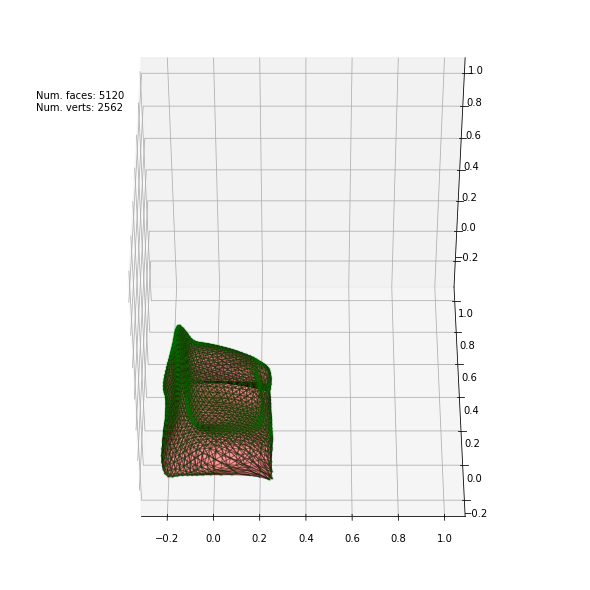

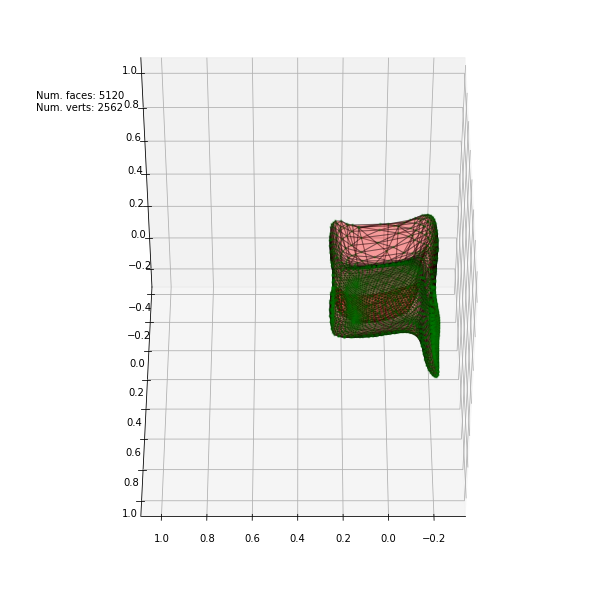

In [ ]:
plot_meshes([ mesh_ab._data.__dict__["data"]], rot_start=270)
plot_meshes([ mesh_ba._data.__dict__["data"]])

In [ ]:
mesh_ab.export("a_b.obj")
mesh_ba.export("b_a.obj")

'# https://github.com/mikedh/trimesh\nv 0.17664397 -0.01176123 0.21748484\nv 0.14465475 0.00771991 -0.14579019\nv 0.19729465 -0.03058716 -0.22248964\nv 0.15328025 0.00822545 -0.02895396\nv 0.05214859 -0.06400998 0.22296364\nv -0.21063036 0.22145342 0.05091939\nv -0.21301819 -0.13343264 0.00054456\nv -0.21020170 0.26127764 0.21782536\nv 0.01754309 -0.00363749 0.03061889\nv -0.20970855 0.21329896 0.01567714\nv 0.16354647 0.00942245 -0.09446474\nv -0.17866667 0.19501105 -0.16955323\nv 0.16192324 0.00958329 -0.14295070\nv 0.07902620 0.00662165 -0.18652321\nv -0.21371156 0.22433736 -0.07347477\nv -0.21128073 0.22314125 0.07565220\nv 0.19121287 0.01510837 0.14873166\nv 0.23869951 -0.08004049 0.06730072\nv -0.21571240 0.33088154 0.03649753\nv -0.20296294 0.29208075 0.06914694\nv 0.24529596 -0.03697583 -0.18610402\nv -0.15436905 0.01105426 -0.01768050\nv -0.22074338 -0.33651267 0.21889634\nv 0.07476518 0.00116639 0.21875206\nv -0.12577816 -0.02324252 0.11436972\nv 0.25124875 -0.15105121 -0.195